##### Copyright 2019 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
# Copyright 2019 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Assignment 3 - NNs for Text Classification (James Charge: 44900333 -> N = 3)

### Initial Run - Task 0 - Directly from the Tutorial


In [1]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.12.0
Eager mode:  True
Hub version:  0.13.0
GPU is available


In [ ]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [ ]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 25000, test entries: 25000


In [ ]:
train_examples[:10]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

In [ ]:
train_labels[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model._name = "OrigNN"
model.summary()

Model: "OrigNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 18s 468ms/step - loss: 0.6711 - accuracy: 0.6239 - val_loss: 0.6278 - val_accuracy: 0.7447
Epoch 2/40
30/30 [==============================] - 8s 274ms/step - loss: 0.5620 - accuracy: 0.7951 - val_loss: 0.5055 - val_accuracy: 0.8046
Epoch 3/40
30/30 [==============================] - 7s 242ms/step - loss: 0.4182 - accuracy: 0.8583 - val_loss: 0.4007 - val_accuracy: 0.8397
Epoch 4/40
30/30 [==============================] - 7s 246ms/step - loss: 0.3006 - accuracy: 0.9021 - val_loss: 0.3422 - val_accuracy: 0.8588
Epoch 5/40
30/30 [==============================] - 7s 228ms/step - loss: 0.2193 - accuracy: 0.9296 - val_loss: 0.3142 - val_accuracy: 0.8684
Epoch 6/40
30/30 [==============================] - 7s 237ms/step - loss: 0.1610 - accuracy: 0.9524 - val_loss: 0.3059 - val_accuracy: 0.8720
Epoch 7/40
30/30 [==============================] - 11s 382ms/step - loss: 0.1183 - accuracy: 0.9691 - val_loss: 0.3010 - val_accuracy: 0.8739
Epoc

In [ ]:
results = model.evaluate(test_examples, test_labels)

print(results)

782/782 [==============================] - 4s 5ms/step - loss: 0.6355 - accuracy: 0.8455
[0.6354926824569702, 0.84552001953125]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

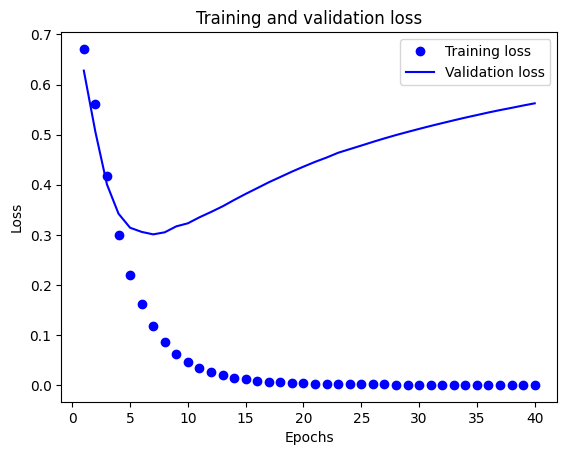

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

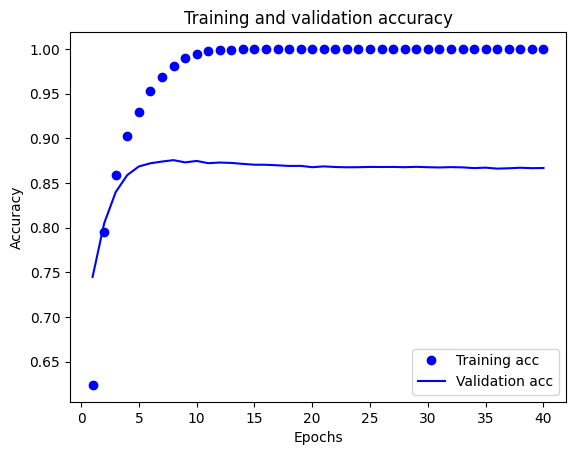

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Task 1 - Not Pre-Trained Embeddings (ScratchNN Creation)

In [2]:
import re
import string

train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

print(train_data)

tf.random.set_seed(42)
train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIH3Q8G/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIH3Q8G/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIH3Q8G/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
(<tf.Tensor: shape=(25000,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a 

In [3]:
vocabsize = 1000
textveclayer = tf.keras.layers.TextVectorization(max_tokens=vocabsize)
textveclayer.adapt(train_examples)

In [4]:
embedding_dim = 16
max_features = 10000

model = tf.keras.Sequential([
    textveclayer,
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1)])


model._name = "ScratchNN"
model.summary()

Model: "ScratchNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-train

In [5]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [6]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 7s 67ms/step - loss: 0.6930 - accuracy: 0.5284 - val_loss: 0.6929 - val_accuracy: 0.5164
Epoch 2/40
30/30 [==============================] - 1s 47ms/step - loss: 0.6927 - accuracy: 0.5268 - val_loss: 0.6924 - val_accuracy: 0.5284
Epoch 3/40
30/30 [==============================] - 2s 65ms/step - loss: 0.6920 - accuracy: 0.5512 - val_loss: 0.6915 - val_accuracy: 0.5255
Epoch 4/40
30/30 [==============================] - 2s 52ms/step - loss: 0.6907 - accuracy: 0.5549 - val_loss: 0.6898 - val_accuracy: 0.5751
Epoch 5/40
30/30 [==============================] - 2s 52ms/step - loss: 0.6885 - accuracy: 0.5844 - val_loss: 0.6870 - val_accuracy: 0.6478
Epoch 6/40
30/30 [==============================] - 2s 66ms/step - loss: 0.6847 - accuracy: 0.6299 - val_loss: 0.6819 - val_accuracy: 0.5723
Epoch 7/40
30/30 [==============================] - 2s 71ms/step - loss: 0.6783 - accuracy: 0.6518 - val_loss: 0.6738 - val_accuracy: 0.6345
Epoch 8/40
30

In [8]:
results = model.evaluate(test_examples, test_labels)

print(results)

782/782 [==============================] - 4s 5ms/step - loss: 0.3782 - accuracy: 0.8449
[0.37816908955574036, 0.8449199795722961]


In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

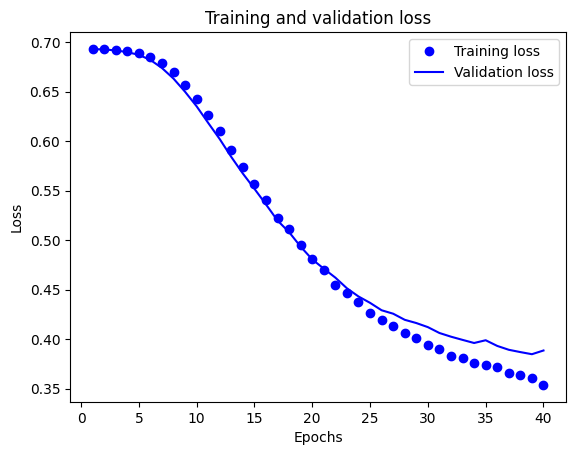

In [10]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

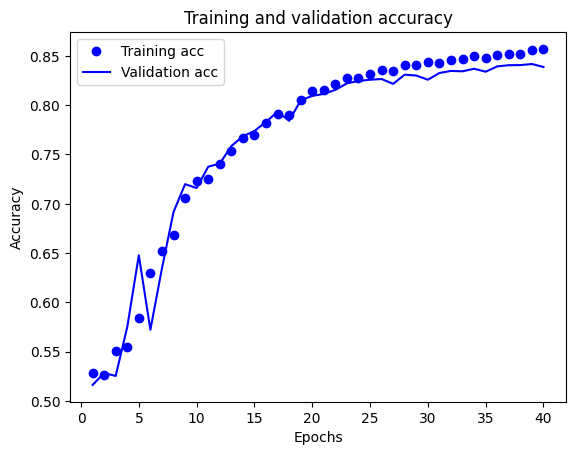

In [11]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

####Summary on Task 1:
For this comparison we are just focussing on the final validation and test accuracies.
- For OrigNN: it had a final validation accuracy of: 0.8667, and a test accuracy of: 0.8455.
- For ScratchNN: it had a final validation accuracy of: 0.8409 and a test accuracy of: 0.8420.

So, just comparing the final validation and test accuracies, it looks like the OrigNN is performing more accurately, and this looks to be assisted by the pre-trained embedding.
- Obviously looking at the training graphs you can see the scratchNN model learns slower without the pre-trained embedding, but it does not really start to overfit until the end, while the OrigNN overfits after about 7/8 epochs.

### Task 2 - DenseNNi Creation and Evaluation - Changing size of Dense Layer

In [ ]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model._name = "DenseNNi"
model.summary()

Model: "OrigNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_4 (Dense)             (None, 80)                4080      
                                                                 
 dense_5 (Dense)             (None, 1)                 81        
                                                                 
Total params: 48,194,761
Trainable params: 48,194,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 10s 254ms/step - loss: 0.6225 - accuracy: 0.6870 - val_loss: 0.5492 - val_accuracy: 0.7491
Epoch 2/40
30/30 [==============================] - 11s 366ms/step - loss: 0.4555 - accuracy: 0.8119 - val_loss: 0.4098 - val_accuracy: 0.8250
Epoch 3/40
30/30 [==============================] - 11s 373ms/step - loss: 0.3053 - accuracy: 0.8827 - val_loss: 0.3460 - val_accuracy: 0.8476
Epoch 4/40
30/30 [==============================] - 9s 304ms/step - loss: 0.2075 - accuracy: 0.9268 - val_loss: 0.3164 - val_accuracy: 0.8636
Epoch 5/40
30/30 [==============================] - 7s 228ms/step - loss: 0.1401 - accuracy: 0.9563 - val_loss: 0.3138 - val_accuracy: 0.8690
Epoch 6/40
30/30 [==============================] - 8s 258ms/step - loss: 0.0918 - accuracy: 0.9763 - val_loss: 0.3258 - val_accuracy: 0.8703
Epoch 7/40
30/30 [==============================] - 6s 216ms/step - loss: 0.0588 - accuracy: 0.9882 - val_loss: 0.3410 - val_accuracy: 0.8697
Epo

In [ ]:
results = model.evaluate(test_examples, test_labels)

print(results)

782/782 [==============================] - 5s 7ms/step - loss: 0.7589 - accuracy: 0.8428
[0.7589243650436401, 0.8427600264549255]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

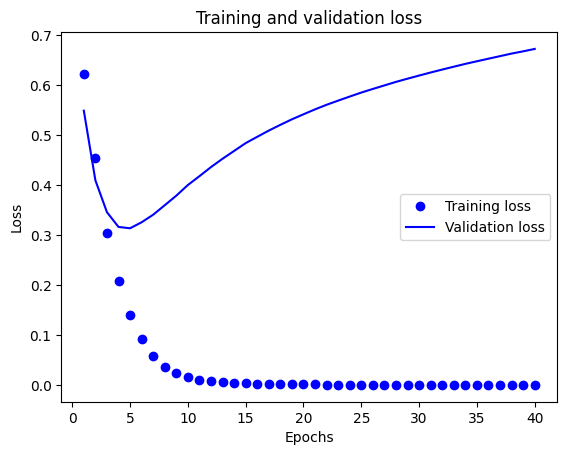

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

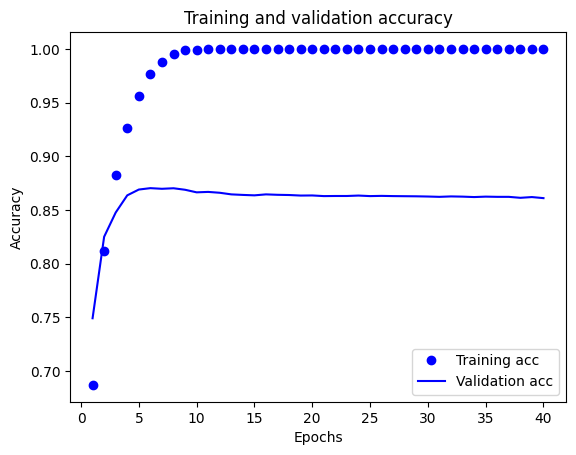

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

####Summary on Task 2:
To start the comparison we will look at the final scores first:
- For OrigNN: it had a final validation accuracy of: 0.8667, and a test accuracy of: 0.8455.
- For DenseNNi: it had a final validation accuracy of: 0.8610 and a test accuracy of: 0.8428.

Now comparing their training at each epoch, looking at OrigNN, its accuracy for validation flattens out around 10/11 epoch, while DenseNNi flattens and worsens on the validation accuracy from the 6th epoch.

The training loss for both models are similar, with the DenseNNi being a bit steeper in the early epochs. Looking at the validation loss though you can see that DenseNNi has a much steeper increase in validation loss after 5 epochs compared to OrigNN. Due to this the validation loss for DenseNNi ends up being 0.1 higher than OrigNN at the end of the 40 epochs of training.

This can be expected, as the DenseNNi has a larger hidden layer, allowing more complexity in the model to be learnt. This can increase overfitting, as the model learns the complexities present in the train set that may not be present in the validation set.


### Task 3 - DenseNNii Creation and Evaluation - L2 Regulariser on Dense Layer

In [ ]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(tf.keras.layers.Dense(1))
model._name = "DenseNNii"
model.summary()

Model: "DenseNNii"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_8 (Dense)             (None, 80)                4080      
                                                                 
 dense_9 (Dense)             (None, 1)                 81        
                                                                 
Total params: 48,194,761
Trainable params: 48,194,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 8s 222ms/step - loss: 5.6737 - accuracy: 0.6101 - val_loss: 4.5610 - val_accuracy: 0.7074
Epoch 2/40
30/30 [==============================] - 5s 179ms/step - loss: 3.7878 - accuracy: 0.7593 - val_loss: 3.0483 - val_accuracy: 0.7680
Epoch 3/40
30/30 [==============================] - 7s 235ms/step - loss: 2.5227 - accuracy: 0.8174 - val_loss: 2.0492 - val_accuracy: 0.8108
Epoch 4/40
30/30 [==============================] - 7s 239ms/step - loss: 1.6846 - accuracy: 0.8604 - val_loss: 1.4003 - val_accuracy: 0.8373
Epoch 5/40
30/30 [==============================] - 7s 224ms/step - loss: 1.1385 - accuracy: 0.8897 - val_loss: 0.9903 - val_accuracy: 0.8512
Epoch 6/40
30/30 [==============================] - 7s 235ms/step - loss: 0.7905 - accuracy: 0.9095 - val_loss: 0.7383 - val_accuracy: 0.8607
Epoch 7/40
30/30 [==============================] - 6s 213ms/step - loss: 0.5702 - accuracy: 0.9266 - val_loss: 0.5834 - val_accuracy: 0.8673
Epoch 

In [ ]:
results = model.evaluate(test_examples, test_labels)

print(results)

782/782 [==============================] - 5s 6ms/step - loss: 0.3901 - accuracy: 0.8534
[0.3901350796222687, 0.85343998670578]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

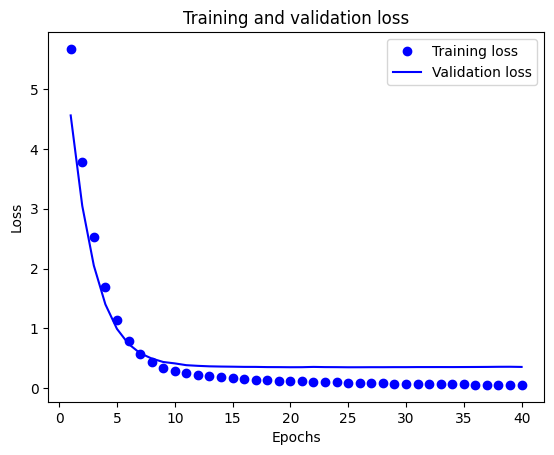

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

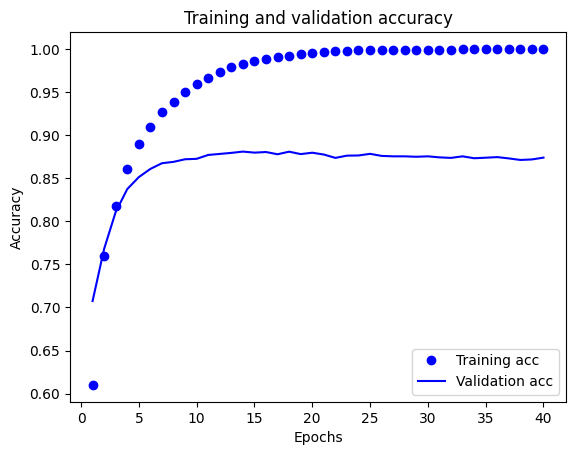

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

####Summary on Task 3:
To start the comparison we will look at the final scores first:
- For DenseNNi: it had a final validation accuracy of: 0.8610 and a test accuracy of: 0.8428.
- For DenseNNii: it had a final validation accuracy of: 0.8738 and a test accuracy of: 0.8534.

Comparing these two models, the DenseNNii has a better final accuracy on both the validation set and the test set. Looking at the training graphs, the reason looks to be that the validation loss does not increase in later epochs like it does for DenseNNi. For DenseNNii the validation loss looks to plateau and stay around 0.35. DenseNNi and DenseNNii are still both overfitted, it is just that the extra training does not make DenseNNii worse, due to have the dense layer being L2 regularised. This regularisation helps to overcome some of the overfitting.

### Task 4 - DenseNNiii Creation and Evaluation - 2 Dense Layers, Both Regularised

In [ ]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteVT88P2/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteVT88P2/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteVT88P2/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(tf.keras.layers.Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(tf.keras.layers.Dense(1))
model._name = "DenseNNiii"
model.summary()

Model: "DenseNNiii"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 80)                4080      
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 48,201,241
Trainable params: 48,201,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 13s 273ms/step - loss: 11.9152 - accuracy: 0.6220 - val_loss: 9.3020 - val_accuracy: 0.7073
Epoch 2/40
30/30 [==============================] - 6s 216ms/step - loss: 7.5381 - accuracy: 0.7613 - val_loss: 5.8511 - val_accuracy: 0.7697
Epoch 3/40
30/30 [==============================] - 8s 268ms/step - loss: 4.7237 - accuracy: 0.8145 - val_loss: 3.6733 - val_accuracy: 0.8092
Epoch 4/40
30/30 [==============================] - 7s 223ms/step - loss: 2.9549 - accuracy: 0.8567 - val_loss: 2.3307 - val_accuracy: 0.8341
Epoch 5/40
30/30 [==============================] - 8s 266ms/step - loss: 1.8658 - accuracy: 0.8866 - val_loss: 1.5240 - val_accuracy: 0.8485
Epoch 6/40
30/30 [==============================] - 7s 244ms/step - loss: 1.2093 - accuracy: 0.9107 - val_loss: 1.0505 - val_accuracy: 0.8586
Epoch 7/40
30/30 [==============================] - 6s 214ms/step - loss: 0.8235 - accuracy: 0.9256 - val_loss: 0.7793 - val_accuracy: 0.8644
Epoc

In [ ]:
results = model.evaluate(test_examples, test_labels)

print(results)

782/782 [==============================] - 4s 5ms/step - loss: 0.4254 - accuracy: 0.8550
[0.4254322946071625, 0.8550400137901306]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

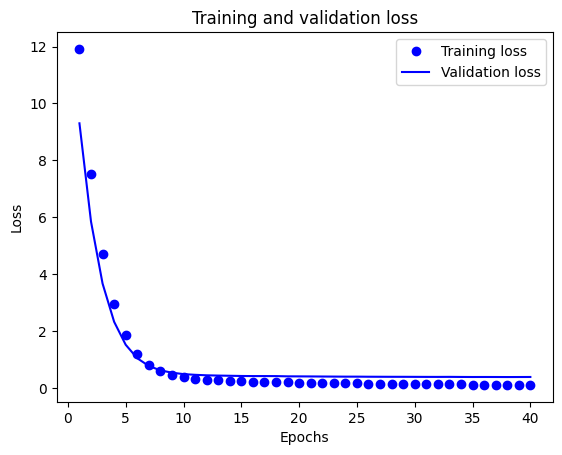

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

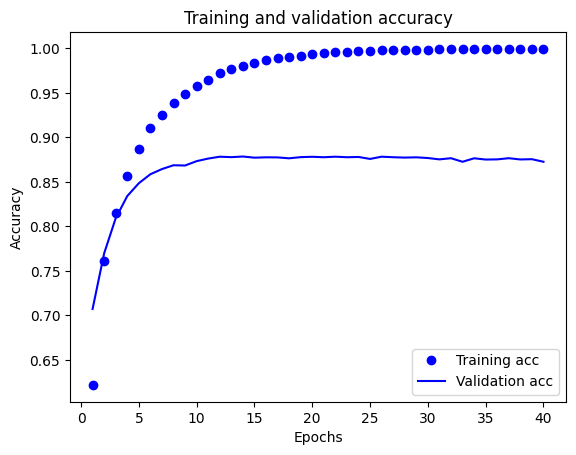

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

####Summary on Task 4:
To start the comparison we will look at the final scores first:
- For DenseNNii: it had a final validation accuracy of: 0.8738 and a test accuracy of: 0.8534.
- For DenseNNiii: it had a final validation accuracy of: 0.8726 and a test accuracy of: 0.8550

Comparing these two models on their final accuracy, the DenseNNiii has a better final accuracy on the test set, while DenseNNii had a better final accuracy on the validation set. For DenseNNiii the validation loss is closer to the training loss than it is for DenseNNii. This is showing less overfitting for DenseNNiii. The less overfitting is the result of having an extra L2 regularised layer.

Overall the models performed very similarly, with them both having very flat validation accuracy changes after epoch 15.

### Task 5 - DropNNi Creation and Evaluation - 1 Dense Layer, 1 Dropout Layer

In [ ]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model._name = "DropNNi"
model.summary()

Model: "DropNNi"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 80)                4080      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 48,194,761
Trainable params: 48,194,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 12s 321ms/step - loss: 5.8017 - accuracy: 0.5693 - val_loss: 4.6690 - val_accuracy: 0.6889
Epoch 2/40
30/30 [==============================] - 16s 528ms/step - loss: 3.8821 - accuracy: 0.7305 - val_loss: 3.1246 - val_accuracy: 0.7664
Epoch 3/40
30/30 [==============================] - 9s 306ms/step - loss: 2.5924 - accuracy: 0.8007 - val_loss: 2.1026 - val_accuracy: 0.8050
Epoch 4/40
30/30 [==============================] - 9s 301ms/step - loss: 1.7371 - accuracy: 0.8495 - val_loss: 1.4394 - val_accuracy: 0.8336
Epoch 5/40
30/30 [==============================] - 8s 276ms/step - loss: 1.1780 - accuracy: 0.8804 - val_loss: 1.0144 - val_accuracy: 0.8523
Epoch 6/40
30/30 [==============================] - 9s 294ms/step - loss: 0.8190 - accuracy: 0.9058 - val_loss: 0.7530 - val_accuracy: 0.8595
Epoch 7/40
30/30 [==============================] - 7s 241ms/step - loss: 0.5935 - accuracy: 0.9211 - val_loss: 0.5950 - val_accuracy: 0.8644
Epoc

In [ ]:
results = model.evaluate(test_examples, test_labels)

print(results)

782/782 [==============================] - 5s 6ms/step - loss: 0.3913 - accuracy: 0.8550
[0.39129459857940674, 0.8550000190734863]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

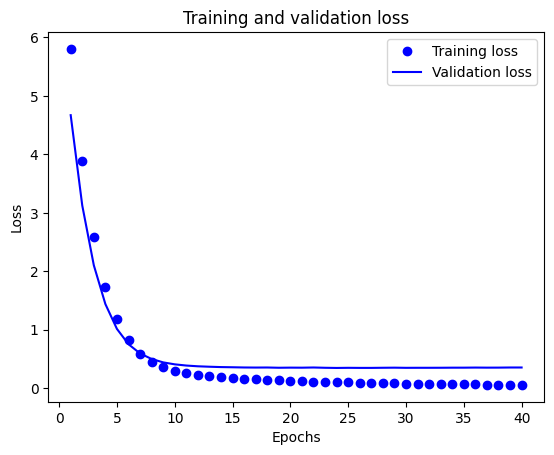

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

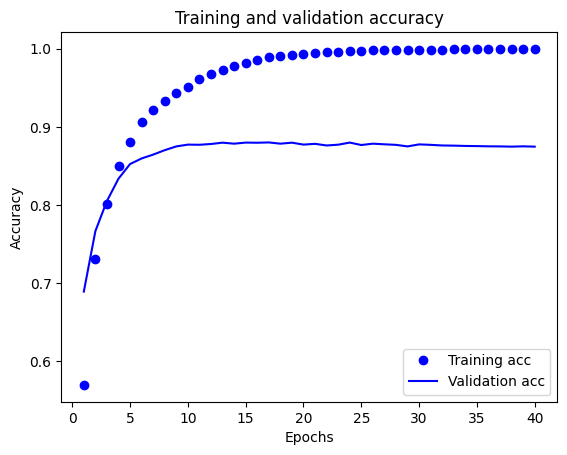

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

####Summary on Task 5:
To start the comparison we will look at the final scores first:
- For DenseNNii: it had a final validation accuracy of: 0.8738 and a test accuracy of: 0.8534.
- For DropNNi: it had a final validation accuracy of: 0.8746 and a test accuracy of: 0.8550

Comparing these two models on their final accuracy, the DropNNi had only slightly better results over both the validation set and the test set. Throughout performance, DenseNNii reached 88.08% accuracy on the 14th epoch, whereas DropNNi reached 88% pm the 17th epoch. Looking further into the epoch charts, you can see that DropNNi took a bit longer to train and overfit than DenseNNii did. This is due to DropNNi having the dropout layer, dropping out 20% of the neurons randomly on each epoch.

The effect seen here by the dropout is quite small, but it can be seen in the epoch by epoch performance, that the dropout caused DropNNi to take more epochs to reach the same performance as DenseNNii.

Overall, the overfitting on both models is quite similar by the end of 40 epochs.

### Task 6 - DropNNii Creation and Evaluation - Larger Dropout Size

In [ ]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(tf.keras.layers.Dropout(0.45))
model.add(tf.keras.layers.Dense(1))
model._name = "DropNNi"
model.summary()

Model: "DropNNi"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_3 (Dense)             (None, 80)                4080      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 81        
                                                                 
Total params: 48,194,761
Trainable params: 48,194,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 8s 244ms/step - loss: 5.4934 - accuracy: 0.4988 - val_loss: 4.4137 - val_accuracy: 0.6090
Epoch 2/40
30/30 [==============================] - 6s 205ms/step - loss: 3.6841 - accuracy: 0.6257 - val_loss: 2.9749 - val_accuracy: 0.7206
Epoch 3/40
30/30 [==============================] - 6s 203ms/step - loss: 2.4922 - accuracy: 0.7303 - val_loss: 2.0361 - val_accuracy: 0.7716
Epoch 4/40
30/30 [==============================] - 6s 192ms/step - loss: 1.7106 - accuracy: 0.7839 - val_loss: 1.4163 - val_accuracy: 0.8054
Epoch 5/40
30/30 [==============================] - 6s 217ms/step - loss: 1.1863 - accuracy: 0.8382 - val_loss: 1.0119 - val_accuracy: 0.8295
Epoch 6/40
30/30 [==============================] - 5s 160ms/step - loss: 0.8445 - accuracy: 0.8709 - val_loss: 0.7566 - val_accuracy: 0.8479
Epoch 7/40
30/30 [==============================] - 5s 169ms/step - loss: 0.6239 - accuracy: 0.8946 - val_loss: 0.6007 - val_accuracy: 0.8549
Epoch 

In [ ]:
results = model.evaluate(test_examples, test_labels)

print(results)

782/782 [==============================] - 4s 5ms/step - loss: 0.3921 - accuracy: 0.8566
[0.39210042357444763, 0.8565599918365479]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

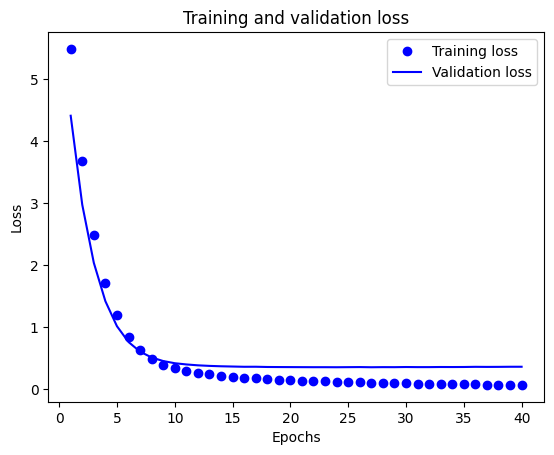

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

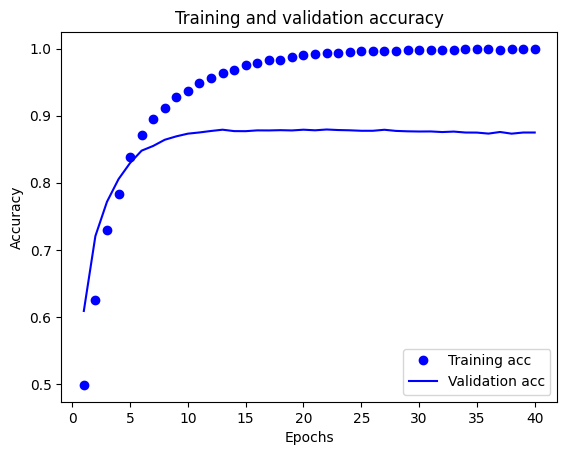

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

####Summary on Task 6:
To start the comparison we will look at the final scores first:
- For DropNNi: it had a final validation accuracy of: 0.8746 and a test accuracy of: 0.8550
- For DropNNii: it had a final validation accuracy of: 0.8749 and a test accuracy of: 0.8566

Comparing the two models final performance, the DropNNii model performed slightly better across both datasets. By increasing the size of the dropout, the difference between validation loss and training loss was slightly decreased, a sign of less overfitting.

Comparing the early stages of the model fitting, DropNNii had slower validation accuracy improvement than the DropNNi model did, with DropNii reaching 0.8050 by epoch 3, while DropNNii was at 0.7716 after the 3rd epoch. This shows the effect of the dropout being increased.

Overall the model fit was similar but the larger dropout resulted in the DropNNii model not overfitting as much as the DropNNi model.

### Task 7 - Select NNBest and Test the Choice

In [ ]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(tf.keras.layers.Dropout(0.45))
model.add(tf.keras.layers.Dense(1))
model._name = "NNBest"
model.summary()

Model: "NNBest"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 80)                4080      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 48,194,761
Trainable params: 48,194,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=17,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/17
30/30 [==============================] - 21s 524ms/step - loss: 5.7766 - accuracy: 0.5417 - val_loss: 4.6512 - val_accuracy: 0.6750
Epoch 2/17
30/30 [==============================] - 15s 490ms/step - loss: 3.8845 - accuracy: 0.6715 - val_loss: 3.1345 - val_accuracy: 0.7403
Epoch 3/17
30/30 [==============================] - 8s 278ms/step - loss: 2.6160 - accuracy: 0.7535 - val_loss: 2.1228 - val_accuracy: 0.7820
Epoch 4/17
30/30 [==============================] - 7s 217ms/step - loss: 1.7706 - accuracy: 0.8090 - val_loss: 1.4581 - val_accuracy: 0.8167
Epoch 5/17
30/30 [==============================] - 8s 256ms/step - loss: 1.2108 - accuracy: 0.8568 - val_loss: 1.0310 - val_accuracy: 0.8429
Epoch 6/17
30/30 [==============================] - 7s 225ms/step - loss: 0.8504 - accuracy: 0.8852 - val_loss: 0.7660 - val_accuracy: 0.8560
Epoch 7/17
30/30 [==============================] - 8s 278ms/step - loss: 0.6235 - accuracy: 0.9055 - val_loss: 0.6045 - val_accuracy: 0.8601
Epoc

In [ ]:
results = model.evaluate(test_examples, test_labels)

print(results)

782/782 [==============================] - 4s 5ms/step - loss: 0.3760 - accuracy: 0.8662
[0.3759981691837311, 0.8662400245666504]


In [ ]:
NNBest_predictions = model.predict(test_examples)
print(NNBest_predictions)
print(NNBest_predictions.shape)

782/782 [==============================] - 4s 5ms/step
[[ 0.04022276]
 [ 0.90881395]
 [-1.5958666 ]
 ...
 [-4.4975724 ]
 [ 2.306136  ]
 [ 2.388612  ]]
(25000, 1)


In [ ]:
most_positive_indices = np.argsort(NNBest_predictions.flatten())[-5:][::-1]
most_negative_indices = np.argsort(NNBest_predictions.flatten())[:5]
print(most_positive_indices)
print(most_negative_indices)

[13557  2432 23416 20844 10792]
[10851 21298 15337 16685 14354]


In [ ]:
print('Inspecting the positive predictions')
for i in most_positive_indices:
    print(test_examples[i], test_labels[i])

Inspecting the positive predictions
b'Cult-director Lucio Fulci is probably most famous for his gory Zombie flicks from the 1980s that earned him his rightful reputation as the "Godfather Of Gore". Fulci\'s absolute greatest film, however, dates back to 1972 and, while it is definitely gritty and violent, it is not nearly as gory as many of his other films. "Non Si Sevizia Un Paperino" aka. "Don\'t Torture A Duckling" of 1972 is not only by far Fulci\'s greatest film, this tantalizing and utterly brilliant Giallo is one of the absolute highlights of the genre. The stunning atmosphere and tantalizing suspense, the great Sizilian setting, the intriguing story the brilliant performances or the intense moments of sheer shock - I don\'t know what to praise most about this ingenious Giallo! "Don\'t Torture A Duckling" truly delivers cinematic perfection in every aspect, which makes it an absolute masterpiece of Italian Horror cinema.<br /><br />Contrary to other Gialli, it is not seductive b

In [ ]:
print('Inspecting the negative predictions')
for i in most_negative_indices:
    print(test_examples[i], test_labels[i])

Inspecting the negative predictions
b"This was truly horrible. Bad acting, bad writing, bad effects, bad scripting, bad camera shots, bad filming, bad characters, bad music, bad editing, bad casting, bad storyline, bad ... well, you get the idea. It was just, just ... what's the word? Oh yeah ... BAD!" 0
b"This is just the same old crap that is spewed from amateur idiots who have no clue how to make a movie--gee maybe that's why it is a straight-to-video wanna-be movie!<br /><br />I guess it is my fault for actually spending money to see it (one of the worst decisions I have ever made). What a waste. I usually like B movies, some of them are actually quite good--but this is just too ridiculous and stupid to even be funny.<br /><br />The losers that made this junk deserve to be put out of business for wasting everyone's time and money making a movie that obviously doesn't even deserve to be on film! These so-called movie makers have absolutely NO talent!<br /><br />Stupid plot, horrible

####Summary on Task 7:
The best performing model selected was the DropNNii model. Its combination of the L2 regularised layer and the larger dropout layer, meant it had two different strategies to try to get the model to not overfit as much as the other models. That is why I selected it. The model also performed well on both the validation set and the test set.
- For the purpose of the NNBest, I chose to fit the model for only 17 epochs, to use its best result from earlier.

- Positive Predictions
 - Looking at the most positive predictions, it looks like the model is predicting well. Looking at the test labels, the model is correctly predicting they are positive reviews.
   - More in depth - the model seems to be good at picking up the positive adjectives and even being able to figure out phrases like this are positive: "dare I say I did shed a tear during the tragic climax which was truly heartbreaking as well as beautifully poignant and moving".
 - Looking at the negative predictions they are all very negative so the model is good at picking up very negative tones in the reviews.
   - The model picks up phrases like this: "I was really hoping that the idea was to make up for the hashed together ineptitude of the first AVP, and yet to my horror: Requiem is far worse than I could have imagined". This is obviously a very negative review and the model predicts it correctly.


### Task 8 - NNBestDrop - Test Time Dropout

In [ ]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(tf.keras.layers.Dropout(0.45))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))
model._name = "NNBestDrop"
model.summary()

Model: "NNBestDrop"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_2 (Dense)             (None, 80)                4080      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 81        
                                                                 
Total params: 48,194,761
Trainable params: 48,194,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=17,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/17
30/30 [==============================] - 9s 256ms/step - loss: 5.8453 - accuracy: 0.5516 - val_loss: 4.7062 - val_accuracy: 0.7088
Epoch 2/17
30/30 [==============================] - 6s 210ms/step - loss: 3.9282 - accuracy: 0.6789 - val_loss: 3.1684 - val_accuracy: 0.7486
Epoch 3/17
30/30 [==============================] - 7s 225ms/step - loss: 2.6471 - accuracy: 0.7488 - val_loss: 2.1494 - val_accuracy: 0.7894
Epoch 4/17
30/30 [==============================] - 6s 210ms/step - loss: 1.7978 - accuracy: 0.8035 - val_loss: 1.4842 - val_accuracy: 0.8136
Epoch 5/17
30/30 [==============================] - 6s 212ms/step - loss: 1.2412 - accuracy: 0.8415 - val_loss: 1.0543 - val_accuracy: 0.8354
Epoch 6/17
30/30 [==============================] - 6s 209ms/step - loss: 0.8782 - accuracy: 0.8721 - val_loss: 0.7849 - val_accuracy: 0.8469
Epoch 7/17
30/30 [==============================] - 6s 201ms/step - loss: 0.6426 - accuracy: 0.8934 - val_loss: 0.6156 - val_accuracy: 0.8557
Epoch 

In [ ]:
results = model.evaluate(test_examples, test_labels)

print(results)

782/782 [==============================] - 4s 5ms/step - loss: 0.3753 - accuracy: 0.8657
[0.3753260672092438, 0.8657199740409851]


In [ ]:
yprobas = np.stack([model(test_examples, training = True) for sample in range (500)])
print(yprobas)
print(yprobas.shape)

[[[0.31706464]
  [0.45380503]
  [0.08767329]
  ...
  [0.00866602]
  [0.95474213]
  [0.9174984 ]]

 [[0.3605495 ]
  [0.68189776]
  [0.1199196 ]
  ...
  [0.01252985]
  [0.8498685 ]
  [0.9621179 ]]

 [[0.5062595 ]
  [0.750589  ]
  [0.17971286]
  ...
  [0.01563673]
  [0.9043326 ]
  [0.7123925 ]]

 ...

 [[0.34635657]
  [0.7737545 ]
  [0.11906044]
  ...
  [0.00976629]
  [0.87720865]
  [0.908026  ]]

 [[0.44882762]
  [0.64882916]
  [0.03914227]
  ...
  [0.01140814]
  [0.95292366]
  [0.90693194]]

 [[0.6304334 ]
  [0.74694735]
  [0.12049448]
  ...
  [0.02219618]
  [0.9020283 ]
  [0.87255114]]]
(500, 25000, 1)


In [ ]:
yproba = yprobas.mean(axis=0)
print(yproba)
print(yproba.shape)

[[0.4847899 ]
 [0.7361274 ]
 [0.11216283]
 ...
 [0.01323306]
 [0.9115343 ]
 [0.89690363]]
(25000, 1)


In [ ]:
rounded_predictions = np.round(yproba)
print(rounded_predictions)

[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]


In [ ]:
accuracy_metric = tf.keras.metrics.Accuracy()
accuracy_metric.update_state(test_labels, rounded_predictions)
accuracy = accuracy_metric.result().numpy()
print(accuracy)

0.86576


In [ ]:
test_example_subset = test_examples[160:180]
test_label_subset = test_labels[160:180]

In [ ]:
for x, test in enumerate(test_example_subset):
    print(test)
    print('Actual label: ',  test_label_subset[x])
    print('NNBestDrop Predicted: ', yproba[160+x], ' . Equivalent to a: ',rounded_predictions[160+x])
    if NNBest_predictions[160+x] < 0:
        rounded_nnbest = 0
    else:
        rounded_nnbest = 1
    print('NNBest Predicted: ', NNBest_predictions[160+x], ' . Equivalent to a: ', str(rounded_nnbest))
    print('\n')

b'For all losers who gave it negative review,its because you probably have sex once in 2 years,or you are in LTR with one girl for years. And guess what ? She is going to cheat on you when player like those on that show approach her somewhere.Off course any male who is not as good as these guys are going to hate them and hate the show. And that one chick who thinks this show is meant to mock these guys.. its more actually how to show clueless man how to pick up woman.What these guys are doing it way better then what most man are doing-not approaching at all.For anybody who has open mind I recommend to read the book "the game" by neil strauss.It deals with similar theme as this show'
Actual label:  1
NNBestDrop Predicted:  [0.5303298]  . Equivalent to a:  [1.]
NNBest Predicted:  [0.18069151]  . Equivalent to a:  1


b"Films about the mundane are often the most interesting of all films to me, in the hands of an insightful artist who examines all the twisted little details of the mundane.

####Summary on Task 8:

So, to perform dropout at test time, I used this line from the lecture code: yprobas = np.stack([model(test_examples, training = True) for sample in range (500)]). It allowed me to test the model on each test example 500 times, with dropout turned on via the training = True section. I then wrote code that finds the mean across these 500 predictions per example and then finally I rounded the prediction to be binary.
 - Looking at the accuracy, for NNBest it scored 0.8657 on the test set.
 - For NNBestDrop it scored 0.86576 on the test set.
   - This shows a slight improvement in test accuracy through using the test time dropout in a monte carlo loop.

Now looking at the 20 predictions above we can see how the NNBest model predicted and how the NNBestDrop model predicted the reviews. For 19/20 reviews the models predicted the exact same labels.
 - The 1 review that they disagreed on was the 20th review where both models predicted very close to their threshholds, so they were quite uncertain. The review is about a Sopranos season, and it sounds like the reviewer normally likes the show but does not like the season, so it can be seen why the model may struggle with this example.
 - Another interesting example is the 8th example. Both models said it was a positive review but it was negative. I think the models struggled here, as the review starts positively and then moves towards the negative.
   - It seems that the models can sometimes get caught finding the positive notes in the review and not take into account that the ending of the review is negative. It appears that many of the reviewers start positive and finish negative, as if they had high hopes and were then disappointed. The models understandably struggle with this review format.

Overall the models perform very similarly in these 20 reviews. The NNBest correctly predicted the 20th example which is the only example that the two models differed on, so it performed better overall. However, the models scored and predicted very similarly.